#============================================================================================================================================
# **Física Teórica 3 (Mecánica Estadística): Teórica 12 - Extras**
#============================================================================================================================================

# Comparación de la magnetización según Bragg-Williams y Bethe
Este notebook busca los ceros de la relación para la magnetización media (o de la variable de rango largo $L$) en la aproximación de campo medio de Bragg-Williams para el modelo de Ising, y los compara contra la solución con el método de Bethe. Usamos el método de la secante para calcular los ceros de las relaciones de Bragg-Williams y de Bethe a diferentes temperaturas, y graficamos el resultado. Recuerden ejecutar cada celda con SHIFT+ENTER.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [ ]:
# Definimos parámetros para el sistema
q   = 4   # Número de primeros vecinos
J   = 1   # Energía de interacción entre primeros vecinos
kTc = q*J # Temperatura crítica según Bragg-Williams

# Generamos un vector con temperaturas en el rango kT~0 y kT=2*kTc
kT = np.arange(.004*kTc, 2*kTc, .001*2*kTc)

## Magnetización en la aproximación de Bragg-Williams
Buscamos los ceros de $L = \tanh(qJL/kT)$ en función de la temperatura.

In [ ]:
def f(x):													 # Definimos la función de Bragg-Williams
	return x - np.tanh(beta*q*J*x)

# Usamos el método de la secante para encontrar los ceros para cada temperatura
L0 = np.zeros(np.size(kT))
x = 1.1 # Guess inicial
for i in range(np.size(kT)):
	beta = 1./kT[i]
	L0[i] = newton(f, x, tol=1e-08, maxiter=100)

## Magnetización en la aproximación de Bethe
Buscamos los ceros de $\alpha'=(q-1)\ln[\cosh(\alpha'+\gamma)/\cosh(\alpha'-\gamma)]/2$ en función de la temperatura, donde $\gamma=J/kT$. Luego, el parámetro de largo rango en esta aproximación es $$L = \frac{\sinh(2 \alpha')}{\cosh(2 \alpha')+e^{-2J/kT}}$$

In [ ]:
def g(x):																												 # Definimos la función de Bethe
	return x - (q-1)*np.log(np.cosh(x+beta*J)/np.cosh(x-beta*J))/2

# Usamos el método de la secante para encontrar los ceros para cada temperatura
alphap = np.zeros(np.size(kT))
x = 100 # Guess inicial
for i in range(np.size(kT)):
	beta = 1./kT[i]
	alphap[i] = newton(g, x, tol=1e-08, maxiter=100)

LB = np.sinh(2*alphap)/(np.cosh(2*alphap)+np.exp(-2*J/kT)) # Calculamos la magnetización (o el parámetro de largo rango L)

## Comparamos ambos resultados
Graficamos $L$ en función de $kT$ en la aproximación de Bragg-Williams y de Bethe. Como referencia, para $q=4$ y $J=1$ Bragg-Williams da $kT_c=4$, Bethe da $kT_c\approx 2.88$, mientras que la solución exacta corresponde a $kT_c\approx 2.27$.

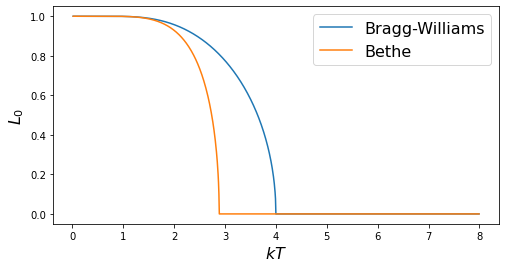

In [ ]:
plt.figure(figsize=(8,4))							 # Graficamos los resultados
plt.plot(kT,L0,label='Bragg-Williams')
plt.plot(kT,LB,label='Bethe')
plt.legend(fontsize=16)
plt.xlabel(r'$kT$',fontsize=16)
plt.ylabel(r'$L_0$',fontsize=16)
plt.show()

#———————————————————————————————————————————————————————————————————————————————————————————————

#———————————————————————————————————————————————————————————————————————————————————————————————